***
# 오전 수업
***
***

## 다중회귀분석(Multivariate Regression)
> 여러 개의 독립변수가 종속 변수에 영향을 주고 선형 관계를 갖는 경우에 다중회귀분석(Multivariate Regression)을 사용

### 다중회귀분석 예제
> UCI 자동차 연비 데이터셋으로 다중회귀분석

### multivariate_regression.py

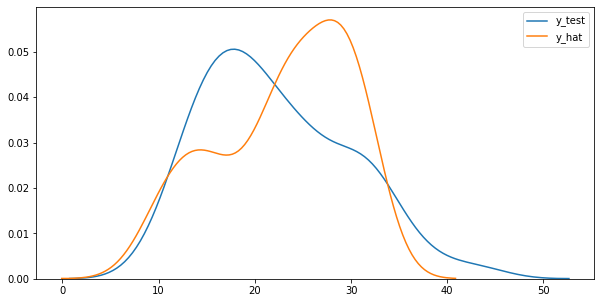

In [5]:
# multivariate_regression.py

# UCI 자동차 연비 데이터셋으로 다중회귀분석

# 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 자동차 정보 파일 읽어오기
# CSV 파일을 읽어와서 데이터프레임으로 변환
df = pd.read_csv('c://python3/src/2020_03_19/auto-mpg.csv', header=None)
#print(df.head())

# 컬럼명 설정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower'
    , 'weight', 'acceleration', 'model year', 'origin', 'name']
#print(df.head())
#df.info()
# 3   horsepower    398 non-null    object
# 8   name          398 non-null    object

# 통계요약 정보 확인 (object인 horespower와 name 없음)
#print(df.describe()); print()

# horsepower 고유값 확인
#print(df['horsepower'].unique()) #'193.0' '?' '100.0'

# 출력값 중 '?'를 np.NaN 치환 필요 (결측치, null)
df['horsepower'].replace('?', np.NaN, inplace=True)

# 결측데이터(np.NaN) 제거
df.dropna(subset=['horsepower'], axis=0, inplace=True)

# horsepower 열의 자료형 변경 (문자형 ->실수형)
df['horsepower'] = df['horsepower'].astype('float')

#print(df.describe())

#df.info() #  3   horsepower    392 non-null    float64

#print(df['horsepower'].unique()) # 바뀐 거 비교해 보기 (193.  nan 100.)
#print(df['horsepower'].describe())

# 분석에 사용할 컬럼 선택
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# 독립변수와 종속변수 선택
# 독립변수
x = ndf[['cylinders', 'horsepower', 'weight']]
# 종속변수
y = ndf[['mpg']]

# train data와 test data로 분할(7:3 비율)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y
                                                    # 분할 비율
                                                    , test_size=0.3
                                                    # 난수 시드 설정
                                                    , random_state=10)
# 데이터 확인
#print('train data : ', x_train.shape)
#print('test data: ', x_test.shape)
"""
train data :  (274, 3)
test data:  (118, 3)
"""

# 다중회귀 분석
from sklearn.linear_model import LinearRegression

# 모델 생성
model = LinearRegression()

# train data를 이용해서 학습
model.fit(x_train, y_train)

# 결정계수
r_score = model.score(x_test, y_test)

#print('결정계수 : ', r_score) # 결정계수 :  0.6939048496695599

# 회귀계수와 절편 구하기
#print('회귀계수 : ', model.coef_)
#print('절편 : ', model.intercept_)
"""
회귀계수 :  [[-0.60691288 -0.03714088 -0.00522268]]
절편 :  [46.41435127]
"""

# 모델이 예측한 값 구하기
y_hat = model.predict(x_test)
#print(y_hat[0:10])

# 실제 데이터(y_test)와 예측값(y_hat)을 그래프로 출력 (커널 밀도 그래프)
plt.figure(figsize=(10, 5))
# 실제값
ax1 = sns.distplot(y_test, hist=False, label = 'y_test')
# 예측값
ax2 = sns.distplot(y_hat, hist=False, label='y_hat', ax = ax1)
plt.show()

***
***
# 분류(Classification)
#### - 지도 학습의 한 영역으로, 학습 데이터를 학습한 후에 미지의 데이터를 분류하는 것
- KNN : K Nearest Neighbor
- SVM : Support Vector Machine
- Decision Tree (의사결정 나무)
- Logistic Regression

## datasets.load_digits()
#### - 분류용, 0에서 9까지 숫자 이미지 픽셀 데이터셋
#### - digits 데이터셋은 0부터 9까지 손으로 쓴 숫자 이미지 데이터로 구성되어 있다.
#### - 이미지 데이터는 8 x 8픽셀 흑백 이미지로, 1797장이 들어 있다.

### digits.py

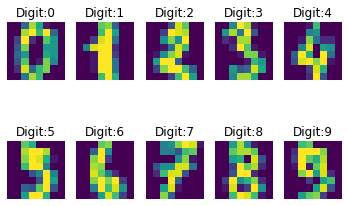

In [2]:
# digits.py

# digits 데이터셋은 0부터 9까지 손으로 쓴 숫자 이미지 데이터로 구성되어 있다.
# 이미지 데이터는 8 x 8픽셀 흑백 이미지로, 1797장이 들어 있다.

from sklearn import datasets
import matplotlib.pyplot as plt

# digits dataset 로드
digits = datasets.load_digits()

#print(digits)

# 이미지 라벨
#print(digits.target)
# 이미지
#print(digits.images)

# 0부터 9까지 이미지를 2행 5열로 출력
for label, img in zip(digits.target[:10], digits.images[:10]):
    # 2행 5열로 배치 (0번 이미지를 첫번째, 1번 이미지를 두번째, ...)
    plt.subplot(2, 5, label + 1)
    # 축 수치 지우기
    plt.axis('off')
    plt.imshow(img)
    # 흑백 이미지 설정(gray scale, img)
    #plt.imshow(img, cmap=plt.cm.gray)
    # x축 라벨 재설정
    plt.xlabel('')
    # 이미지마다 타이틀 설정
    plt.title('Digit:{0}'.format(label))

plt.show()

### 분류기를 만들어 정답률 평가
- scikit-learn 을 사용해 3과 8 이미지 데이터를 분류하는 분류기를 만든 후에 분류기의 성능을 테스트
- digits 데이터셋은 0부터 9까지 손으로 쓴 숫자 이미지는 8 x 8픽셀 흑백 이미지로 1797장
- 이 중에서 숫자 3과 8 이미지는 357개 이미지

#### 학습에 사용할 데이터
> digits 데이터셋의 전체 이미지 개수 : 1797 개
>
> 숫자 3과 8 이미지 갯수 : 357 개
>
> 학습 데이터 개수 : 214 개 ( 3과 8 전체 이미지의 60% )
#### 분류기 종류
> - 의사결정 나무 분류기( Decision Tree Classifier )
> > classifier = tree.DecisionTreeClassifier()
> - 분류기를 이용해서 학습
> > classifier.fit()

### classification.py

In [6]:
# classification.py
# 분류기를 만들어 정답률 평가

import numpy as np
from sklearn import datasets

# 난수 시드값 설정
# 동일한 결과를 출력하기 위하여 사용
np.random.seed(0)

# 데이터셋 로딩
digits = datasets.load_digits()

# 3과 8의 데이터 위치 구하기
flag38 = (digits.target == 3) + (digits.target == 8)

# print(flag38)
# [False False False ...  True False  True]

# 3과 8 이미지와 라벨을 변수에 저장
labels = digits.target[flag38]
images = digits.images[flag38]
# print(labels.shape)
# print(images.shape)
"""
(357,)
(357, 8, 8)
"""

# 3과 8 이미지 데이터를 2차원에서 1차원으로 변환
images = images.reshape(images.shape[0], -1)
print('reshape: ', images.shape) #(357, 64)

# train data와  test data
# 3과 8의 이미지 개수 357
n_samples = len(flag38[flag38])
print(n_samples) #357

# 학습 데이터 개수 214
train_size = int(n_samples * 3/5)
print(train_size) #214
# 학습데이터: images[:214], labels[:214]

# 결정 트리 분류기 모델 생성
from sklearn import tree

classifier = tree.DecisionTreeClassifier()

# 모델 학습 fit(images[:214], labels[:213])
# 학습 데이터는 손으로 쓴 숫자의 전체 이미지 데이터 중 60%를 사용해서 학습
classifier.fit(images[:train_size], labels[:train_size])

# 테스트 데이터 구하기 labels[214:]
test_label = labels[train_size:]
# 실제 데이터의 라벨값
print(test_label)

# 테스트 데이터를 이용하여 라벨 예측
predict_label = classifier.predict(images[train_size:])
# 예측 데이터의 라벨값
print(predict_label)

# 분류기의 성능 평가
# 성능평가 모듈 import
from sklearn import metrics

# 정답률(Accuracy):  0.8741258741258742
print('정답률(Accuracy): ', metrics.accuracy_score(test_label, predict_label))

reshape:  (357, 64)
357
214
[3 8 3 3 3 3 8 3 3 3 8 3 3 8 8 8 8 8 3 8 3 8 3 8 8 8 3 8 3 3 3 3 8 3 3 3 8
 3 3 8 8 8 8 8 3 8 3 8 3 8 8 8 3 8 3 3 3 3 8 3 3 3 8 3 3 8 8 8 8 3 8 3 8 3
 8 8 8 3 8 3 3 3 3 8 3 3 3 8 3 3 8 8 8 8 8 3 8 3 3 8 8 8 3 8 3 3 3 3 8 3 3
 3 8 3 3 8 8 3 8 3 8 3 8 8 8 3 8 3 3 3 3 8 3 3 3 8 3 3 8 8 8 8 8]
[3 8 3 3 3 3 8 3 3 8 8 3 3 8 8 8 8 8 3 8 3 8 3 8 8 8 8 8 3 3 3 3 8 3 3 3 8
 3 3 8 8 8 8 8 3 8 3 8 3 8 8 8 3 8 3 3 3 3 8 3 3 3 8 3 3 8 8 8 8 3 8 3 8 3
 8 8 8 3 3 3 3 3 3 3 3 3 3 8 3 3 8 8 8 8 8 3 8 3 3 8 8 8 8 8 8 8 8 8 8 3 3
 3 8 3 3 8 8 3 8 8 8 8 8 8 8 8 8 8 8 3 8 8 8 3 8 8 8 3 8 8 8 8 8]
정답률(Accuracy):  0.8741258741258742


### classification.py (수정)

In [18]:
# classification.py
# 분류기를 만들어 정답률 평가

import numpy as np
from sklearn import datasets

"""
# 난수 시드값 설정
# 동일한 결과를 출력하기 위하여 사용
np.random.seed(0)
"""

# 데이터셋 로딩
digits = datasets.load_digits()

# 3과 8의 데이터 위치 구하기
flag38 = (digits.target == 3) + (digits.target == 8)

# print(flag38)
# [False False False ...  True False  True]

# 3과 8 이미지와 라벨을 변수에 저장
labels = digits.target[flag38]
images = digits.images[flag38]
# print(labels.shape)
# print(images.shape)
"""
(357,)
(357, 8, 8)
"""

# 3과 8 이미지 데이터를 2차원에서 1차원으로 변환
images = images.reshape(images.shape[0], -1)
print('reshape: ', images.shape) #(357, 64)

"""
# train data와  test data 분할
# 3과 8의 이미지 개수 357
n_samples = len(flag38[flag38])
print(n_samples) #357

# 학습 데이터 개수 214
train_size = int(n_samples * 3/5)
print(train_size) #214
# 학습데이터: images[:214], labels[:214]
"""

# train data와  test data 분할 (7:3 비율)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    #이미지
    images
    # 라벨
    , labels
    # test data 비율 30%
    , test_size=0.3
    # 난수 시드
    , random_state=10)


# 결정 트리 분류기 모델 생성
from sklearn import tree

classifier = tree.DecisionTreeClassifier()

# 모델 학습 fit(images[:214], labels[:213])
# 학습 데이터는 손으로 쓴 숫자의 전체 이미지 데이터 중 60%를 사용해서 학습
#classifier.fit(images[:train_size], labels[:train_size])
classifier.fit(x_train, y_train)

"""
# 테스트 데이터 구하기 labels[214:]
test_label = labels[train_size:]
# 실제 데이터의 라벨값
print(test_label)
"""
# 실제 데이터의 라벨값 (y_test에 이미 라벨값이 들어가 있음)
print(y_test)

# 테스트 데이터를 이용하여 라벨 예측
#predict_label = classifier.predict(images[train_size:])
predict_label = classifier.predict(x_test)
# 예측 데이터의 라벨값
print(predict_label)

# 분류기의 성능 평가
# 성능평가 모듈 import
from sklearn import metrics

# 정답률(Accuracy):  0.8741258741258742
#print('정답률(Accuracy): ', metrics.accuracy_score(test_label, predict_label))
print('정답률(Accuracy): ', metrics.accuracy_score(y_test, predict_label))
# 정답률(Accuracy):  0.9537037037037037 (할 때마다 바뀜)

reshape:  (357, 64)
[3 3 3 8 8 3 3 8 3 8 3 3 8 8 3 3 8 3 8 8 3 8 3 8 3 8 3 3 8 8 8 3 3 8 8 3 3
 8 8 3 3 8 8 3 8 8 3 3 3 8 3 8 3 8 8 3 3 8 3 3 3 8 3 8 3 8 3 3 8 3 8 8 8 3
 8 8 3 3 8 8 3 8 8 8 3 3 8 8 8 8 8 8 8 3 3 8 3 3 3 3 3 8 3 8 8 3 3 3]
[3 3 3 8 8 3 3 8 3 8 3 3 8 8 3 3 8 3 8 8 3 8 3 8 3 8 8 3 8 8 8 3 3 8 8 3 3
 8 8 3 3 8 8 3 8 8 3 3 3 8 3 3 3 8 8 3 3 8 3 3 3 8 3 8 3 8 3 8 8 3 8 8 8 3
 3 8 3 3 8 8 3 8 8 8 3 3 8 8 8 8 8 8 8 3 3 8 3 3 8 3 3 8 3 8 8 3 3 3]
정답률(Accuracy):  0.9537037037037037


***
## 분류기의 성능평가 지표
> 정답률(Accuracy), 적합률(Precision), 재현율(Recall), F 값 등
>
> #### 혼돈행렬(confusion matrix)
> > 분류기 평가에서 자주 사용
> >
> > Positive와 Negtive 각각에서 정답(True)과 오답(False), 조합이 4개
> >
> > TP(True Postive), FP(False Positive, True 예측하고 False), FN(False Negative, False 예측하고 True), TN(True Negative)

> 1. 정답률(Accuracy) : 전체 예측에서 정답이 있는 비율(전체 중에서 올바르게 예측한 것이 몇 개인가)
> > 정답률 (Accuracy) = ( TP + TN ) / ( TP + FP + FN + TN )
> 2. 적합률(Precision) : 분류기가 Positive로 예측했을 때 진짜로 Positive한 비율
> > Positive로 예측하는 동안 어느 정도 맞았는지, 정확도가 높은지를 나타내는 지표 (내가 푼 문제 중에서 맞힌 정답 개수)
> > 적합률 (Precision) = TP / ( TP + FP )
> 3. 재현율(Recall) : 진짜로 Positive인 것을 분류기가 얼마나 Positive라고 예측했는지 나타내는 비율 (전체 중에서 내가 몇 개를 맞혔는가)
> > 실제로 Positive인 것 중에서 어느 정도 검출할 수 있었는지 가늠하는 지표
> >
> > 재현율 (Recall) = TP / ( TP + FN )
> 4. F값(F-measure ) : 적합률과 재현율의 조화 평균. 지표 2개를 종합적으로 볼 때 사용
> > F값이 높을수록 분류 모형의 예측력이 좋음
> >
> > F값(F-measure ) = 2 x Precision x Recall / Precision + Recall

> #### 일반적으로 분류기의 성능을 이야기 할 때, 정답률(Accuracy)을 보지만 그것만으로 충분하지 않을 경우에 다른 성능평가 지표를 같이 살펴봐야 함

***
### 혼돈행렬(confusion matrix) 
> metrics.confusion_matrix()
### 정답률 (Accuracy)
> metrics.accuracy_score()
### 적합률 (Precision)
> metrics.precision_score()
### 재현율 (Recall)
> metrics.recall_score()
### F값(F-measure)
> metrics.f1_score()
***

### classification_validate.py
- classfication.py 구문에 추가하여 작성

In [19]:
# classification_validate.py
# 분류기를 만들어 성능 평가 : 정답률, 혼돈행렬, 적합률, 재현율, F값 

import numpy as np
from sklearn import datasets

# 데이터셋 로딩
digits = datasets.load_digits()

# 3과 8의 데이터 위치 구하기
flag38 = (digits.target == 3) + (digits.target == 8)

# print(flag38)
# [False False False ...  True False  True]

# 3과 8 이미지와 라벨을 변수에 저장
labels = digits.target[flag38]
images = digits.images[flag38]

# 3과 8 이미지 데이터를 2차원에서 1차원으로 변환
images = images.reshape(images.shape[0], -1)

# train data와  test data 분할 (7:3 비율)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    #이미지
    images
    # 라벨
    , labels
    # test data 비율 30%
    , test_size=0.3
    # 난수 시드
    , random_state=10)


# 결정 트리 분류기 모델 생성
from sklearn import tree

classifier = tree.DecisionTreeClassifier()

classifier.fit(x_train, y_train)

# 테스트 데이터를 이용하여 라벨 예측
predict_label = classifier.predict(x_test)

# 분류기의 성능 평가
# 성능평가 모듈 import
from sklearn import metrics

print('혼돈행렬: ', metrics.confusion_matrix(y_test, predict_label))
print()
print('적합률(3): ', metrics.precision_score(y_test, predict_label, pos_label=3))
print('적합률(8): ', metrics.precision_score(y_test, predict_label, pos_label=8))
print()
print('재현율(3): ', metrics.recall_score(y_test, predict_label, pos_label=3))
print('재현율(8): ', metrics.recall_score(y_test, predict_label, pos_label=8))
print()
print('F값(3): ', metrics.f1_score(y_test, predict_label, pos_label=3))
print('F값(8): ', metrics.f1_score(y_test, predict_label, pos_label=8))

혼돈행렬:  [[51  4]
 [ 2 51]]

적합률(3):  0.9622641509433962
적합률(8):  0.9272727272727272

재현율(3):  0.9272727272727272
재현율(8):  0.9622641509433962

F값(3):  0.9444444444444444
F값(8):  0.9444444444444444


## 분류기의 종류
> ### 결정 트리 (Decision Tree)
> ### 랜덤 포레스트 (Random Forest)
> ### 에이다부스트 (AdaBoost)
> ### 서포트 벡터 머신 (Support Vector Machine) 

### 결정 트리(Decision Tree)
 1. 데이터를 여러 등급으로 분류하는 지도 학습 중의 하나로 트리 구조를 이용한 분류 알고리즘

 2. 학습 데이터에서 트리 모델을 생성
  
  > 무엇을 기준으로 분기할지에 따라 분류
  
 3. 분류 규칙을 트리 모델로 가시화 가능, 분류 결과의 해석이 비교적 용이하다는 장점

 4. 생성한 분류 규칙도 편집 가능, 학습을 위한 계산 비용 저렴

 5. 과적합 하는 경향, 취급하는 데이터의 특성에 따라 트리모델을 생성하기 어렵다는 단점

 6. 과적합 하는 경향 때문에 결정 트리 단독으로 사용하지 않고 앙상블 학습을 조합해서 사용하는 경우가 많음

### 랜덤 포레스트(Random Forest)
 1. 앙상블 학습의 배깅(bagging)으로 분류되는 알고리즘
 > 배깅은 학습 데이터를 빼고 중복을 허용 해 그룹 여러 개로 분할하고 학습 데이터의 그룹마다 약한 학습기를 생성하는 방법
 >
 > 배깅으로 여러 그룹으로 분할한 학습 데이터 그룹에서 약한 학습기를 각각 생성, 약한 학습기를 조합해 성능 좋은 분류기 생성 가능
 2. 전체 학습 데이터 중에서 중복이나 누락을 허용해 학습 데이터셋을 여러 개 추출하여 그 일부의 속성을 사용해 결정 트리(약한 학습기)를 생성
 3. 랜덤 포레스트는 학습과 판별을 빠르게 처리하고, 학습 데이터의 노이즈에도 강함
 4. 랜덤 포레스트는 분류 외에도 회귀나 클러스터링에도 사용 가능
 5. 학습 데이터의 개수가 적을 경우에는 과적합이 발생하기 때문에 학습 데이터 적은 경우에는 사용하지 않는 것이 좋음 

#### -  train data를 무작위로 sampling해서 만든 다수의 Decision tree를 기반으로 다수결로 결과를 추출

### RandomForest.py

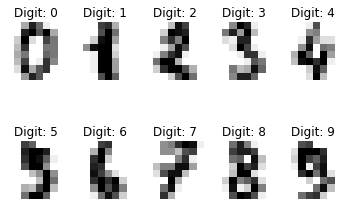

Accuracy: 0.9090909090909091
Confusion matrix: [[64 11]
 [ 2 66]]
Precision(3): 0.9696969696969697
Precision(8): 0.8571428571428571
Recall(3): 0.8533333333333334
Recall(8): 0.9705882352941176
F-measure(3): 0.9078014184397163
F-measure(8): 0.9103448275862068


In [26]:
# RandomForest.py

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import ensemble
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# 난수 시드값 설정
np.random.seed(0)

# 손으로 쓴 숫자 데이터 읽기
digits = datasets.load_digits()

# 이미지를 2행 5열로 표시
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(2, 5, label + 1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit: {0}'.format(label))
plt.show()

# 3과 8의 데이터 위치를 구하기
flag_3_8 = (digits.target == 3) + (digits.target == 8)

# 3과 8의 데이터를 구하기
images = digits.images[flag_3_8]
labels = digits.target[flag_3_8]

# 3과 8의 이미지 데이터를 1차원으로 변환
images = images.reshape(images.shape[0], -1)

# 분류기 생성
n_samples = len(flag_3_8[flag_3_8])
train_size = int(n_samples * 3 / 5)

# 모델 객체 생성
# n_estimators는 약한 학습기 개수로 20을 지정, max_depth는 트리모델의 최대깊이
classifier = ensemble.RandomForestClassifier(n_estimators=20, max_depth=3)
classifier.fit(images[:train_size], labels[:train_size])

# 분류기 성능을 확인
expected = labels[train_size:]
predicted = classifier.predict(images[train_size:])
print('Accuracy:', accuracy_score(expected, predicted)) #라벨값과 예측된 라벨값
print('Confusion matrix:', confusion_matrix(expected, predicted)) #라벨값과 예측된 라벨값
print('Precision(3):', precision_score(expected, predicted, pos_label=3)) #적합률
print('Precision(8):', precision_score(expected, predicted, pos_label=8))
print('Recall(3):', recall_score(expected, predicted, pos_label=3)) #재현율
print('Recall(8):', recall_score(expected, predicted, pos_label=8))
print('F-measure(3):', f1_score(expected, predicted, pos_label=3)) #F값
print('F-measure(8):', f1_score(expected, predicted, pos_label=8))

### 앙상블 학습(Ensenbles)
 1. 성능이 낮은 분류기(약한 학습기)를 조합해 성능이 높은 분류기를 만드는 방법
 2. 약한 학습기 알고리즘은 정해진 것이 없으므로 적절히 선택해서 사용해야 함
 3. 앙상블 학습 결과는 약한 학습기의 결과 값 중 다수결로 결정
 4. 앙상블 학습은 약한 학습기 생성 방법에 따라 배깅(bagging)과 부스팅(boosting)으로 분류

### 배깅(bagging)
 1. 학습 데이터를 빼고 중복을 허용 해 그룹 여러 개로 분할하고 학습 데이터의 그룹마다 약한 학습기를 생성하는 방법
 2. 배깅으로 여러 그룹으로 분할한 학습 데이터 그룹에서 약한 학습기를 각각 생성, 약한 학습기를 조합해 성능 좋은 분류기 생성 가능

### 부스팅(boosting)
#### 약한 학습기를 여러 개 준비하고 가중치가 있는 다수결로 분류하는 방법
> 가중치도 학습에 따라 결정
> 
>  난이도가 높은 학습 데이터를 올바르게 분류할 수 있는 약한 학습기의 판별 결과를 중시하도록 가중치를 업데이트해 나감

### 에이다부스트(AdaBoost)
 1. 앙상블 학습의 부스팅(boosting)으로 분류하는 알고리즘
 2. 에이다부스트에서는 난이도가 높은 데이터를 제대로 분류할 수 있는 약한 학습기(weak learner)의 분류 결과를 중시하므로 약한 학습기에 가중치를 줌
 3. 난이도가 높은 학습 데이터와 성능이 높은 약한 학습기에 가중치를 주어서 정확도를 높임
 4. 에이다부스트는 분류 정밀도가 높지만, 학습 데이터의 노이즈에 쉽게 영향
 
각기 다른 데이터에 강점을 가지는 학습기를 여러개 구축
이젂 학습기의 에러에 따라 데이터에 부여되는 가중치 조정

### AdaBoost.py

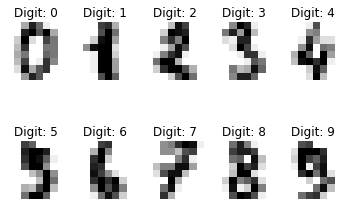

Accuracy: 0.916083916083916
Confusion matrix: [[63 12]
 [ 0 68]]
Precision: 1.0
Recall: 0.84
F-measure: 0.9130434782608696


In [2]:
# AdaBoost.py

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree, ensemble
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# 손으로 쓴 숫자 데이터 읽기
digits = datasets.load_digits()

# 이미지를 2행 5열로 표시
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(2, 5, label + 1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit: {0}'.format(label))
plt.show()

# 3과 8의 데이터 위치를 구하기
flag_3_8 = (digits.target == 3) + (digits.target == 8)

# 3과 8의 데이터를 구하기
images = digits.images[flag_3_8]
labels = digits.target[flag_3_8]

# 3과 8의 이미지 데이터를 1차원으로 변환
images = images.reshape(images.shape[0], -1)

# 분류기 생성
n_samples = len(flag_3_8[flag_3_8])
train_size = int(n_samples * 3 / 5)

# base_estimator는 약한 학습기를 지정하는 파라미터로 여기서는 결정트리를 지정,
# n_estimators는 약한 학습기 개수를 지정
classifier = ensemble.AdaBoostClassifier(base_estimator=
                                         tree.DecisionTreeClassifier(max_depth=3)
                                         , n_estimators=20)
classifier.fit(images[:train_size], labels[:train_size])

# 분류기 성능을 확인
expected = labels[train_size:]
predicted = classifier.predict(images[train_size:])
print('Accuracy:', accuracy_score(expected, predicted))
print('Confusion matrix:', confusion_matrix(expected, predicted))
print('Precision:', precision_score(expected, predicted, pos_label=3))
print('Recall:', recall_score(expected, predicted, pos_label=3))
print('F-measure:', f1_score(expected, predicted, pos_label=3))

### 서포트 벡터 머신 (Support Vector Machine)
 1. 분류 및 회귀 모두 사용 가능한 지도 학습 알고리즘
 2. 서포트 벡터 머신에서는 분할선부터 근접 샘플 데이터까지 마진을 최대화하는 직선이 가장 좋은 분할선
 3. 서포트 벡터 머신은 학습 데이터의 노이즈에 강하고 분류 성능이 매우 좋음
 4. 다른 알고리즘에 비교하면 학습 데이터 개수도 많이 필요하지 않음

### SupportVectorMachine.py

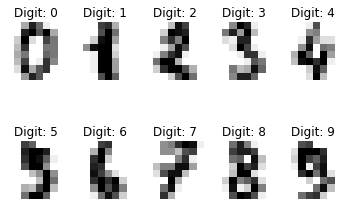

Accuracy: 0.9090909090909091
Confusion matrix: [[62 13]
 [ 0 68]]
Precision: 1.0
Recall: 0.8266666666666667
F-measure: 0.9051094890510949


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [3]:
# SupportVectorMachine.py

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# 손으로 쓴 숫자 데이터 읽기
digits = datasets.load_digits()

# 이미지를 2행 5열로 표시
for label, img in zip(digits.target[:10], digits.images[:10]):
 plt.subplot(2, 5, label + 1)
 plt.axis('off')
 plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
 plt.title('Digit: {0}'.format(label))
plt.show()

# 3과 8의 데이터를 구하기
flag_3_8 = (digits.target == 3) + (digits.target == 8)

# 3과 8의 데이터를 구하기
images = digits.images[flag_3_8]
labels = digits.target[flag_3_8]

# 3과 8의 이미지 데이터를 1차원으로 변환
images = images.reshape(images.shape[0], -1)

# 분류기 생성
n_samples = len(flag_3_8[flag_3_8])
train_size = int(n_samples * 3 / 5)

# SVC(Support Vector Classifier)
# C는 패널티 파라미터로 어느 정도 오류 분류를 허용하는지 나타냄
# 알고리즘에 사용될 커널 유형을 지정 'linear', 'poly', 'rbf‘(기본값), 'sigmoid'(이중분류), 'precomputed
classifier = svm.SVC(kernel = 'rbf')
classifier.fit(images[:train_size], labels[:train_size])

# 분류기 성능을 확인
expected = labels[train_size:]
predicted = classifier.predict(images[train_size:])
print('Accuracy:', accuracy_score(expected, predicted))
print('Confusion matrix:', confusion_matrix(expected, predicted))
print('Precision:', precision_score(expected, predicted, pos_label=3))
print('Recall:', recall_score(expected, predicted, pos_label=3))
print('F-measure:', f1_score(expected, predicted, pos_label=3))

## K 최근접 이웃(KNN) 알고리즘
#### K Nearest Neighbor
#### K개의 가까운 이웃
> 새로운 관측값이 주어지며 기존 데이터 중에서 가장 속성이 비슷힌 K개의 이웃을 먼저 찾음
>
> 가까운 이웃들이 가지고 있는 목표값과 같은 값으로 분류하여 예측
>
> K값에 따라 예측의 정확도가 달라지므로 적절한 K값을 찾는 것이 매우 중요

### knn_classification.py
- seaborn 라이브러리에서 제공되는 titanic 데이터셋의 탑승객의 생존여부를 KNN 알고리즘으로 분류

In [5]:
# knn_classification.py
# seaborn 라이브러리에서 제공되는 titanic 데이터셋의 탑승객의 생존여부를 KNN 알고리즘으로 분류

import pandas as pd
import seaborn as sns

# seaborn 모듈의 titanic 데이터 로드
titanic = sns.load_dataset('titanic')
#titanic.info()

# 한줄에 15개의 컬럼 출력되도록 설정
pd.set_option('display.max_columns', 15)
#print(titanic)

#titanic.info()
#  3   age          714 non-null    float64 << 개수 차이 유의
#  7   embarked     889 non-null    object  << 중복값 유의
#  11  deck         203 non-null    category << null 값 많은 열 제거(유효 데이터 적어서 제거)
#  12  embark_town  889 non-null    object  << embarked 중복값 제거
# dtypes: bool(2), category(2), float64(2), int64(4), object(5)

# deck(배의 갑판), embark_town(승선 도시) 컬럼 삭제
rdf = titanic.drop(['deck', 'embark_town'], axis=1)
# 삭제 확인
#print(rdf.columns.values)
# ['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class' 'who' 'adult_male' 'alive' 'alone']

# age 열에 누락 데이터 행 삭제 (891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)
# 삭제 확인
#print(len(rdf)) #891 - 177 = 714

## embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환
# embarked 열의 알파벳은 타이타닉호에 탑승한 승객의 도시
#print(rdf.describe(include='all')); print()

# 최빈값 알아보기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
#print(most_freq) # S : Southampton

# embarked 열에 누락 데이터(NaN)를 S로 치환 - fillna() 사용
rdf['embarked'].fillna(most_freq, inplace=True)

# 분석에 사용할 열(속성) 선택
# titanic.info()
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
# 결과 확인
#ndf.info()
#print(ndf.head())

# KNN모델을 적용하기 위해 sex열과 embarked열의 범주형 데이터를 숫자형으로 변환
# 원핫인코딩 - 범주형 데이터를 모델이 인식할 수 있도록 숫자형으로 변환하는것
# 2   sex       714 non-null    object
# 6   embarked  714 non-null    object
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

# embarked열에 생성되는 더미 변수가  town_C, town_Q, town_S로 생성되도록 prefix='town' 옵션 추가
onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

# 열 생성 확인
#ndf.info()

# 기존 sex열과 embarked열 삭제
ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
# 열 삭제 확인
#print(ndf.head())
#ndf.info()

# 변수 정의
# 독립변수 x
x = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 'town_C', 'town_Q', 'town_S']]
# 종속변수 y
y = ndf['survived']

# 독립 변수 데이터를 정규화(normalization)
# 데이터의 상대적 크기 차이를 없애기 위하여 정규화
from sklearn import preprocessing

x = preprocessing.StandardScaler().fit(x).transform(x)

# train data 와 test data로 분할(7:3 비율)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    # 독립변수, 종속변수
    x, y
    # test data 비율 설정
    , test_size=0.3
    # 난수 seed 설정
    , random_state=10
)

print('train data(x_train) 개수: ', x_train.shape)
print('test data(x_test) 개수: ', x_test.shape)
print()

# sklearn 라이브러리에서 KNN 분류 모델 가져오기
from sklearn.neighbors import KNeighborsClassifier

# KNN 모델 객체 생성 (k=5로 설정)
knn = KNeighborsClassifier(n_neighbors=5)

# train data를 가지고 모델 학습
knn.fit(x_train, y_train)

# test data를 가지고 y_hat을 예측 (분류)
# 예측값 구하기
y_hat = knn.predict(x_test)

# 첫 10개의 예측값(y_hat)과 실제값(y_test) 비교 : 10개 모두 일치함 (0:사망자, 1:생존자)
print('예측값(y_hat: ', y_hat[0:10])
print('실제값(y_test): ', y_test.values[0:10])
print()

train data(x_train) 개수:  (499, 9)
test data(x_test) 개수:  (215, 9)

예측값(y_hat:  [0 0 1 0 0 1 1 1 0 0]
실제값(y_test):  [0 0 1 0 0 1 1 1 0 0]
